In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns
sns.set()  #  Will import Seaborn functionalities

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Disply all Columns
pd.options.display.max_columns=15

In [4]:
Box_office = pd.read_csv('box_office_predictions.csv') 
Box_office.head()

budget country           director   genre        gross  \
0  237000000.0      UK      James Cameron  Action  760507625.0   
1  200000000.0     USA      James Cameron   Drama  658672302.0   
2  150000000.0     USA    Colin Trevorrow  Action  652270625.0   
3  220000000.0     USA        Joss Whedon  Action  623357910.0   
4  185000000.0     USA  Christopher Nolan  Action  534858444.0   

                     name rating  runtime  score               star  \
0           Avatar (2009)  PG-13      162    7.8    Sam Worthington   
1          Titanic (1997)  PG-13      194    7.8  Leonardo DiCaprio   
2   Jurassic World (2015)  PG-13      124    7.0        Chris Pratt   
3     The Avengers (2012)  PG-13      143    8.1  Robert Downey Jr.   
4  The Dark Knight (2008)  PG-13      152    9.0     Christian Bale   

                                   studio    votes  
0  Twentieth Century Fox Film Corporation   958400  
1  Twentieth Century Fox Film Corporation   865551  
2                      Universal Pictures   470625  
3                          Marvel Studios  1069292  
4                            Warner Bros.  1845853

In [5]:
print("Old Column Names:\n", Box_office.columns) 

Old Column Names:
 Index(['budget', 'country', 'director', 'genre', 'gross', 'name', 'rating',
       'runtime', 'score', 'star', 'studio', 'votes'],
      dtype='object')


In [45]:
Box_office.shape

(6000, 12)

In [46]:
Box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6000 non-null   float64
 1   country   6000 non-null   object 
 2   director  6000 non-null   object 
 3   genre     6000 non-null   object 
 4   gross     6000 non-null   float64
 5   name      6000 non-null   object 
 6   rating    6000 non-null   object 
 7   runtime   6000 non-null   int64  
 8   score     6000 non-null   float64
 9   star      6000 non-null   object 
 10  studio    6000 non-null   object 
 11  votes     6000 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 562.6+ KB


In [8]:
len(Box_office)

6000

In [31]:
Box_office.describe().T

count          mean           std    min         25%         50%  \
budget   6000.0  2.469918e+07  3.721710e+07    0.0        0.00  11000000.0   
gross    6000.0  3.341635e+07  5.735205e+07  441.0  1527796.50  12298970.0   
runtime  6000.0  1.065870e+02  1.802689e+01   50.0       95.00       102.0   
score    6000.0  6.386383e+00  9.949211e-01    1.5        5.80         6.5   
votes    6000.0  7.188537e+04  1.308033e+05   27.0     7791.75     26601.5   

                 75%          max  
budget   32625000.00  300000000.0  
gross    40072560.50  760507625.0  
runtime       115.00        366.0  
score           7.10          9.3  
votes       76774.75    1868308.0

In [11]:
Box_office.describe(include=['object', 'bool', 'category']) # looking at object, bool & categorical data

country     director   genre             name rating          star  \
count     6000         6000    6000             6000   6000          6000   
unique      52         2549      17             6000     13          2317   
top        USA  Woody Allen  Comedy  Brothers (2009)      R  Nicolas Cage   
freq      4281           29    1818                1   3009            38   

                    studio  
count                 6000  
unique                1996  
top     Universal Pictures  
freq                   269

In [12]:
print(Box_office['rating'].unique())

['PG-13' 'PG' 'G' 'R' 'Not specified' 'NC-17' 'UNRATED' 'NOT RATED'
 'TV-PG' 'B' 'TV-14' 'TV-MA' 'B15']


In [5]:
print(Box_office['star'].unique())

['Sam Worthington' 'Leonardo DiCaprio' 'Chris Pratt' ... 'Sadie Frost'
 'Florian Lukas' 'Jemma Dallender']


In [14]:
Box_office['rating'].value_counts()

R                3009
PG-13            1753
PG                815
NOT RATED         151
G                 133
UNRATED            58
Not specified      56
NC-17              20
TV-MA               1
TV-14               1
TV-PG               1
B15                 1
B                   1
Name: rating, dtype: int64

In [15]:
print(Box_office['genre'].unique())

['Action' 'Drama' 'Animation' 'Adventure' 'Comedy' 'Biography' 'Mystery'
 'Crime' 'Horror' 'Sci-Fi' 'Fantasy' 'Romance' 'Thriller' 'Family'
 'Western' 'Musical' 'War']


In [16]:
Box_office['genre'].value_counts()

Comedy       1818
Drama        1280
Action       1175
Crime         463
Adventure     340
Biography     309
Animation     246
Horror        243
Mystery        34
Fantasy        28
Thriller       17
Romance        14
Sci-Fi         13
Family         12
Musical         4
War             2
Western         2
Name: genre, dtype: int64

In [32]:
Box_office['budget'].value_counts()

0.0            1911
20000000.0      166
30000000.0      164
25000000.0      160
15000000.0      152
               ... 
16600000.0        1
260000000.0       1
137000000.0       1
10920000.0        1
11800000.0        1
Name: budget, Length: 338, dtype: int64

In [6]:
Box_office_v2 = Box_office.copy()
Box_office_v2.head()

budget country           director   genre        gross  \
0  237000000.0      UK      James Cameron  Action  760507625.0   
1  200000000.0     USA      James Cameron   Drama  658672302.0   
2  150000000.0     USA    Colin Trevorrow  Action  652270625.0   
3  220000000.0     USA        Joss Whedon  Action  623357910.0   
4  185000000.0     USA  Christopher Nolan  Action  534858444.0   

                     name rating  runtime  score               star  \
0           Avatar (2009)  PG-13      162    7.8    Sam Worthington   
1          Titanic (1997)  PG-13      194    7.8  Leonardo DiCaprio   
2   Jurassic World (2015)  PG-13      124    7.0        Chris Pratt   
3     The Avengers (2012)  PG-13      143    8.1  Robert Downey Jr.   
4  The Dark Knight (2008)  PG-13      152    9.0     Christian Bale   

                                   studio    votes  
0  Twentieth Century Fox Film Corporation   958400  
1  Twentieth Century Fox Film Corporation   865551  
2                      Universal Pictures   470625  
3                          Marvel Studios  1069292  
4                            Warner Bros.  1845853

In [7]:
median_budget = Box_office_v2.budget.median()
median_budget

11000000.0

In [8]:
Box_office_v2['budget'] = Box_office_v2['budget'].replace({0: 11000000})

In [9]:
Box_office_v2['budget'].value_counts()

11000000.0     1966
20000000.0      166
30000000.0      164
25000000.0      160
15000000.0      152
               ... 
890000.0          1
16600000.0        1
260000000.0       1
137000000.0       1
19400000.0        1
Name: budget, Length: 337, dtype: int64

In [10]:
Profit = Box_office_v2["gross"] - Box_office_v2['budget']
Profit

0       523507625.0
1       458672302.0
2       502270625.0
3       403357910.0
4       349858444.0
           ...     
5995    -10998857.0
5996    -10999172.0
5997    -10999453.0
5998    -10999458.0
5999    -10999559.0
Length: 6000, dtype: float64

In [11]:
ROI = (Box_office_v2['gross'] - Box_office_v2['budget'])/Box_office_v2['budget']*100
ROI

0       220.889293
1       229.336151
2       334.847083
3       183.344505
4       189.112672
           ...    
5995    -99.989609
5996    -99.992473
5997    -99.995027
5998    -99.995073
5999    -99.995991
Length: 6000, dtype: float64

In [12]:
Box_office_v2['Profit'] = Profit
Box_office_v2['ROI'] = ROI

In [13]:
Box_office_v2.head()

budget country           director   genre        gross  \
0  237000000.0      UK      James Cameron  Action  760507625.0   
1  200000000.0     USA      James Cameron   Drama  658672302.0   
2  150000000.0     USA    Colin Trevorrow  Action  652270625.0   
3  220000000.0     USA        Joss Whedon  Action  623357910.0   
4  185000000.0     USA  Christopher Nolan  Action  534858444.0   

                     name rating  runtime  score               star  \
0           Avatar (2009)  PG-13      162    7.8    Sam Worthington   
1          Titanic (1997)  PG-13      194    7.8  Leonardo DiCaprio   
2   Jurassic World (2015)  PG-13      124    7.0        Chris Pratt   
3     The Avengers (2012)  PG-13      143    8.1  Robert Downey Jr.   
4  The Dark Knight (2008)  PG-13      152    9.0     Christian Bale   

                                   studio    votes       Profit         ROI  
0  Twentieth Century Fox Film Corporation   958400  523507625.0  220.889293  
1  Twentieth Century Fox Film Corporation   865551  458672302.0  229.336151  
2                      Universal Pictures   470625  502270625.0  334.847083  
3                          Marvel Studios  1069292  403357910.0  183.344505  
4                            Warner Bros.  1845853  349858444.0  189.112672

In [14]:
Box_office_v2['ROI'] = np.where(Box_office_v2['ROI'] > 0.95, 1, 0)

In [15]:
Box_office_v2

budget  country           director   genre        gross  \
0     237000000.0       UK      James Cameron  Action  760507625.0   
1     200000000.0      USA      James Cameron   Drama  658672302.0   
2     150000000.0      USA    Colin Trevorrow  Action  652270625.0   
3     220000000.0      USA        Joss Whedon  Action  623357910.0   
4     185000000.0      USA  Christopher Nolan  Action  534858444.0   
...           ...      ...                ...     ...          ...   
5995   11000000.0       UK    Dominic Anciano  Comedy       1143.0   
5996   11000000.0  Ireland     Ian Fitzgibbon  Action        828.0   
5997   11000000.0   Norway        Petter Næss  Action        547.0   
5998   11000000.0       UK     Sheree Folkson  Comedy        542.0   
5999   11000000.0      USA   Steven R. Monroe   Crime        441.0   

                               name rating  runtime  score               star  \
0                     Avatar (2009)  PG-13      162    7.8    Sam Worthington   
1                    Titanic (1997)  PG-13      194    7.8  Leonardo DiCaprio   
2             Jurassic World (2015)  PG-13      124    7.0        Chris Pratt   
3               The Avengers (2012)  PG-13      143    8.1  Robert Downey Jr.   
4            The Dark Knight (2008)  PG-13      152    9.0     Christian Bale   
...                             ...    ...      ...    ...                ...   
5995    Love, Honor and Obey (2000)      R      103    6.5        Sadie Frost   
5996        Perrier's Bounty (2009)      R       88    6.4      Gabriel Byrne   
5997          Into the White (2012)      R      104    7.2      Florian Lukas   
5998         The Decoy Bride (2011)     PG       89    6.2    Kelly Macdonald   
5999  I Spit on Your Grave 2 (2013)      R      106    5.7    Jemma Dallender   

                                      studio    votes       Profit  ROI  
0     Twentieth Century Fox Film Corporation   958400  523507625.0    1  
1     Twentieth Century Fox Film Corporation   865551  458672302.0    1  
2                         Universal Pictures   470625  502270625.0    1  
3                             Marvel Studios  1069292  403357910.0    1  
4                               Warner Bros.  1845853  349858444.0    1  
...                                      ...      ...          ...  ...  
5995  British Broadcasting Corporation (BBC)     4557  -10998857.0    0  
5996               Parallel Film Productions     5540  -10999172.0    0  
5997           Zentropa International Norway    16674  -10999453.0    0  
5998                        Isle of Man Film     9055  -10999458.0    0  
5999                           Cinetel Films    21145  -10999559.0    0  

[6000 rows x 14 columns]

In [17]:
Box_office_v2['budget'].value_counts()

11000000.0     1966
20000000.0      166
30000000.0      164
25000000.0      160
15000000.0      152
               ... 
890000.0          1
16600000.0        1
260000000.0       1
137000000.0       1
19400000.0        1
Name: budget, Length: 337, dtype: int64

In [18]:
Box_office_v2['ROI'].value_counts()

0    3628
1    2372
Name: ROI, dtype: int64

In [16]:
Box_office_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6000 non-null   float64
 1   country   6000 non-null   object 
 2   director  6000 non-null   object 
 3   genre     6000 non-null   object 
 4   gross     6000 non-null   float64
 5   name      6000 non-null   object 
 6   rating    6000 non-null   object 
 7   runtime   6000 non-null   int64  
 8   score     6000 non-null   float64
 9   star      6000 non-null   object 
 10  studio    6000 non-null   object 
 11  votes     6000 non-null   int64  
 12  Profit    6000 non-null   float64
 13  ROI       6000 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 656.4+ KB


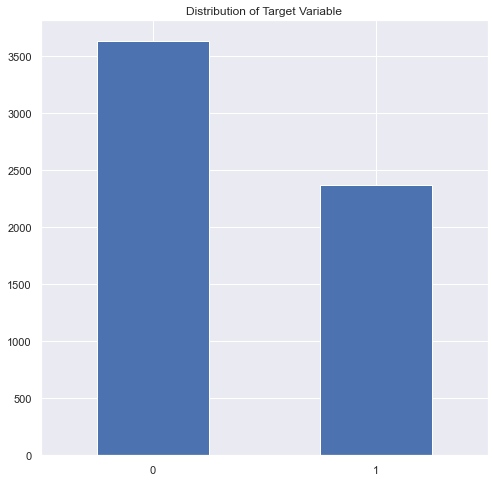

In [89]:
(Box_office_v2['ROI'].value_counts().plot(kind='bar',title='Distribution of Target Variable', x= 'budget',
                                             y= 'TV_ROI', rot=0)
                                            );
#plt.show()

In [90]:
Box_office_v2['ROI'].value_counts(normalize=True)

0    0.604667
1    0.395333
Name: ROI, dtype: float64

<AxesSubplot:xlabel='Profit', ylabel='gross'>

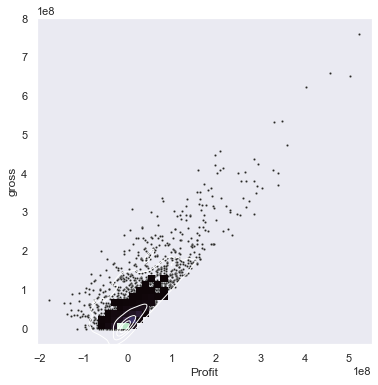

In [91]:
sns.set_theme(style="dark")
#Box_office_v2
# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data= Box_office_v2, x=Box_office_v2['Profit'], y= Box_office_v2['gross'],
                s=5, color=".15")
sns.histplot(data=  Box_office_v2, x=Box_office_v2['Profit'], y= Box_office_v2['gross'],
             bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(data=  Box_office_v2, x=Box_office_v2['Profit'], y= Box_office_v2['gross'],
            levels=5,color="w", linewidths=1)

In [17]:
Box_office_v2['ROI'].mode()

0    0
dtype: int64

In [18]:
Box_office_v2[Box_office_v2['ROI']==1].mean()

budget     3.206204e+07
gross      6.649126e+07
runtime    1.068255e+02
score      6.517411e+00
votes      1.242152e+05
Profit     3.442922e+07
ROI        1.000000e+00
dtype: float64

In [19]:
Box_office_v2.apply(np.max) 

budget                3e+08
country        West Germany
director         Éva Gárdos
genre               Western
gross           7.60508e+08
name        Æon Flux (2005)
rating              UNRATED
runtime                 366
score                   9.3
star            Álex Angulo
studio          micro_scope
votes               1868308
Profit          5.23508e+08
ROI                       1
dtype: object

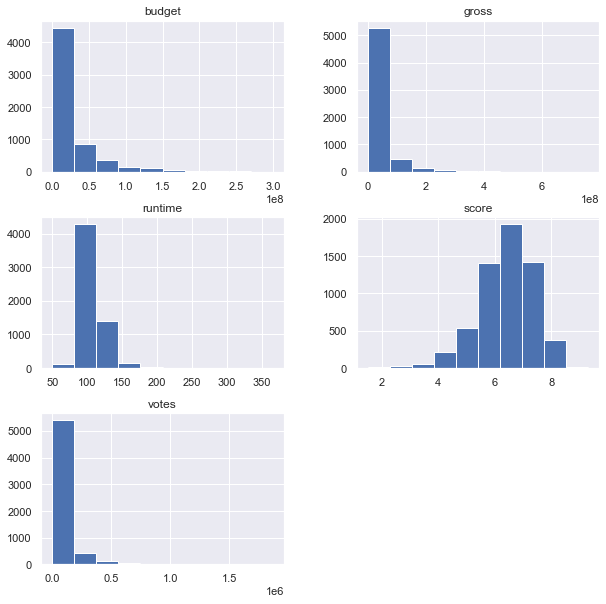

In [58]:
sns.set()
features = ['budget', 'country', 'director', 'genre', 'gross', 'name', 'rating',
            'runtime', 'score', 'star', 'studio', 'votes']

Box_office_v2[features].hist(figsize=(10,10));

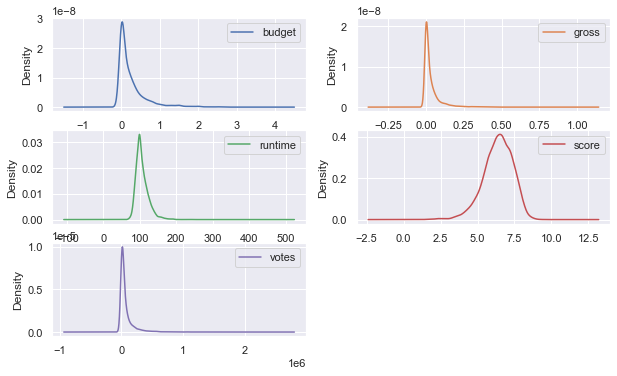

In [145]:
Box_office_v2[features].plot(kind='density', subplots=True, layout=(5, 2), 
                  sharex=False, figsize=(10,10));

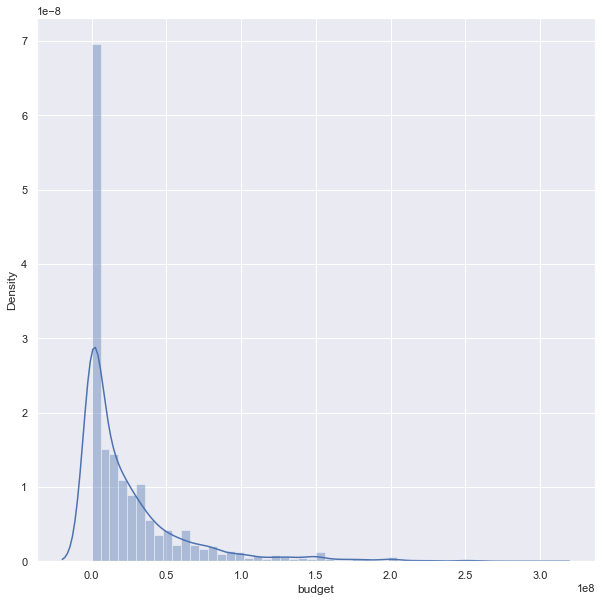

In [146]:
import seaborn as sns
plt.rcParams['figure.figsize'] = 10,10 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row
sns.distplot(Box_office_v2["budget"]) # pass it one variable

# if you are getting warnings related to the package you should use ignore function
import warnings
warnings.filterwarnings ('ignore')

In [95]:
Box_office_v2['ROI'].value_counts()

0    3628
1    2372
Name: ROI, dtype: int64

In [60]:
Box_office_v2.describe(include=['object', 'bool', 'category'])

country     director   genre                             name rating  \
count     6000         6000    6000                             6000   6000   
unique      52         2549      17                             6000     13   
top        USA  Woody Allen  Comedy  Free Willy 3: The Rescue (1997)      R   
freq      4281           29    1818                                1   3009   

                star              studio TV_ROI  
count           6000                6000   6000  
unique          2317                1996      2  
top     Nicolas Cage  Universal Pictures      0  
freq              38                 269   3628

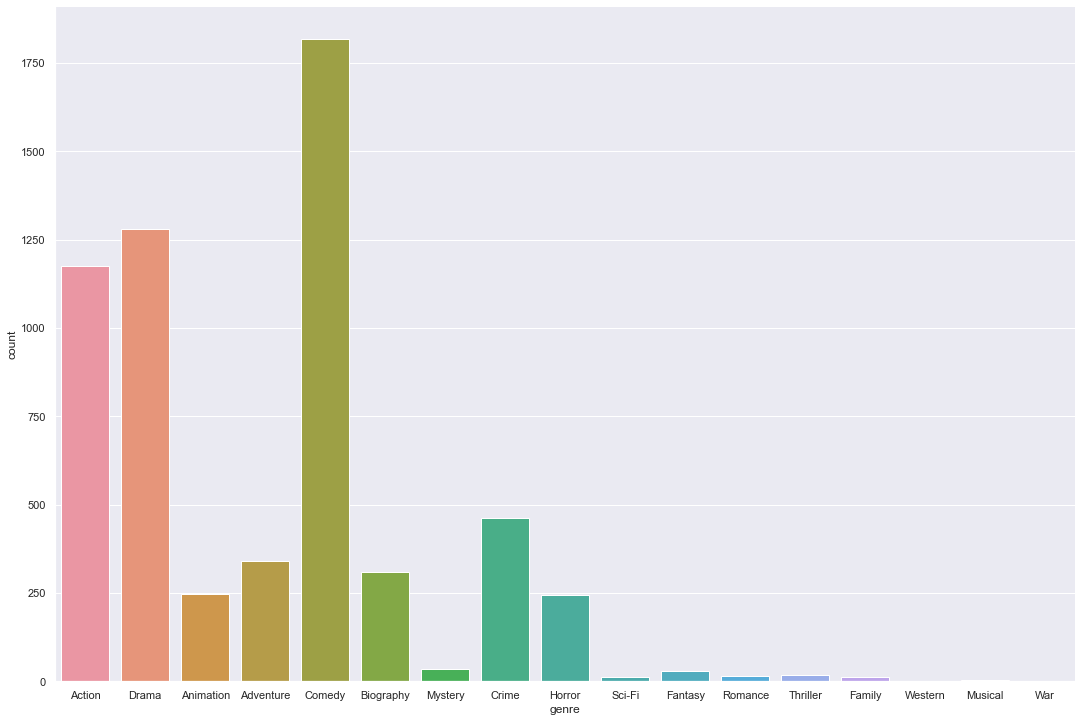

In [136]:
sns.factorplot(x='genre', data=Box_office_v2, kind='count', size=10, aspect=1.5);

In [53]:
Box_office_v2['genre'].value_counts()

Comedy       1818
Drama        1280
Action       1175
Crime         463
Adventure     340
Biography     309
Animation     246
Horror        243
Mystery        34
Fantasy        28
Thriller       17
Romance        14
Sci-Fi         13
Family         12
Musical         4
War             2
Western         2
Name: genre, dtype: int64

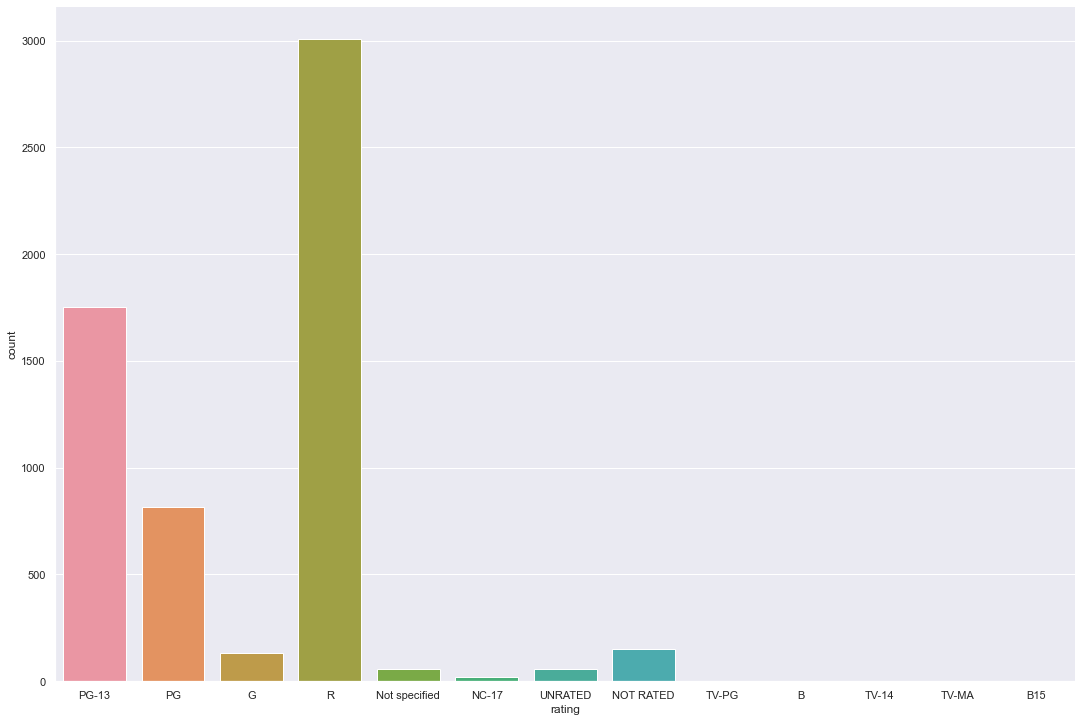

In [150]:
sns.factorplot(x='rating', data=Box_office_v2, kind='count', size=10, aspect=1.5);

In [54]:
Box_office_v2['rating'].value_counts()

R                3009
PG-13            1753
PG                815
NOT RATED         151
G                 133
UNRATED            58
Not specified      56
NC-17              20
TV-MA               1
TV-14               1
TV-PG               1
B15                 1
B                   1
Name: rating, dtype: int64

In [58]:
sns.factorplot(x='country', data=Box_office_v2, kind='count', size=80, aspect=2);

In [59]:
Box_office_v2['country'].value_counts()

USA                               4281
UK                                 615
France                             249
Canada                             126
Germany                            119
Australia                           71
Japan                               59
Spain                               50
Italy                               47
Ireland                             40
Hong Kong                           38
India                               36
Denmark                             31
China                               23
South Korea                         18
New Zealand                         17
Sweden                              17
Belgium                             15
Mexico                              13
Netherlands                         12
Iran                                10
Russia                              10
Argentina                           10
Norway                               8
Czech Republic                       8
Taiwan                   

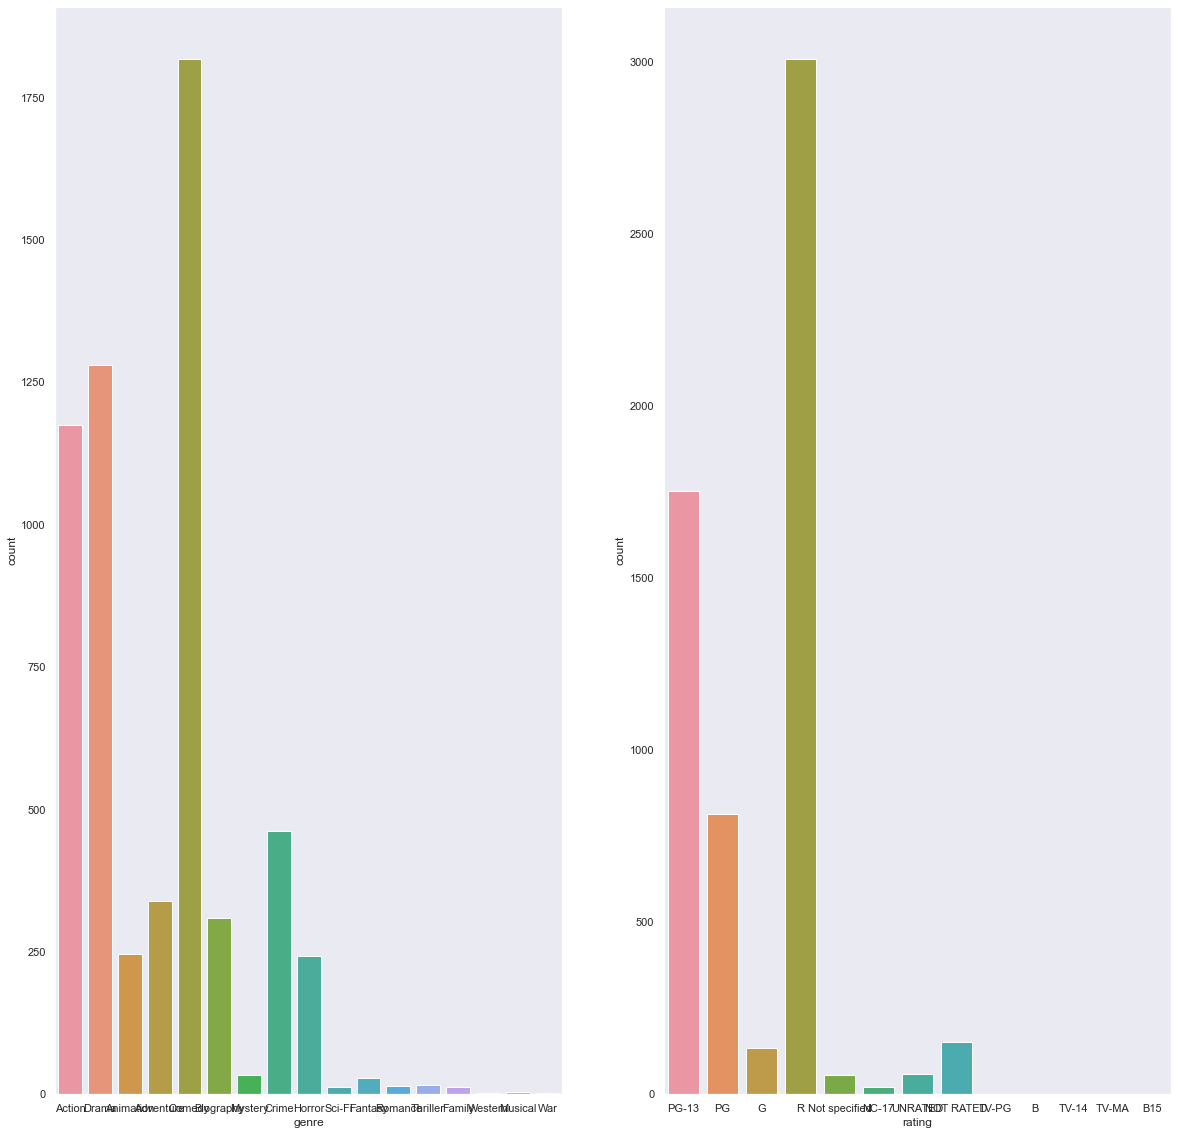

In [60]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))

sns.countplot(x='genre', data= Box_office_v2, ax=axes[0]);
sns.countplot(x='rating', data= Box_office_v2, ax=axes[1]);

# TV & Numerical Data

<AxesSubplot:xlabel='ROI', ylabel='gross'>

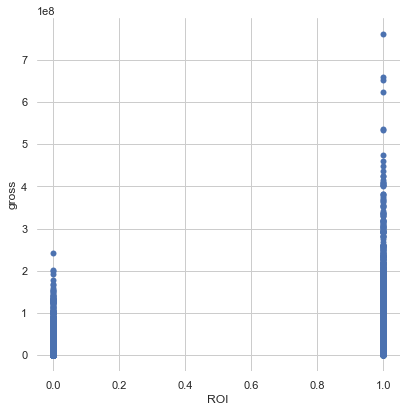

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="ROI", y="gross",palette="ch:r=-.2,d=.3_r",hue_order=clarity_ranking,sizes=(1, 8),
                linewidth=0,data=Box_office_v2, ax=ax)

<AxesSubplot:xlabel='ROI', ylabel='budget'>

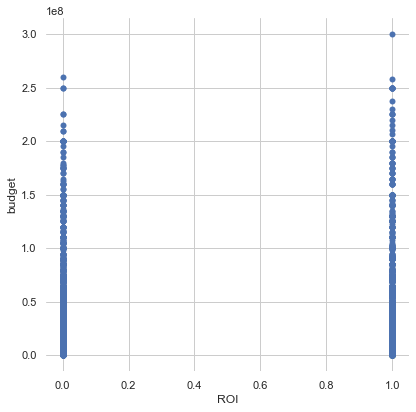

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="ROI", y="budget",palette="ch:r=-.2,d=.3_r",hue_order=clarity_ranking,sizes=(1, 8),
                linewidth=0,data=Box_office_v2, ax=ax)

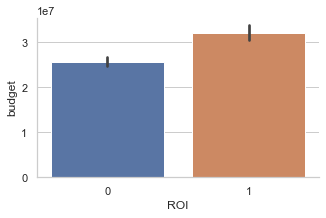

In [98]:
sns.factorplot(x ='ROI', y = 'budget',  kind = 'bar', data = Box_office_v2, size=3, aspect=1.5);

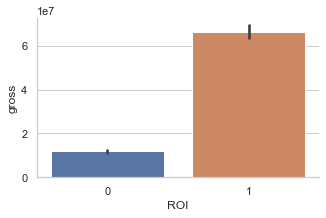

In [99]:
sns.factorplot(x ='ROI', y = 'gross',  kind = 'bar', data = Box_office_v2, size=3, aspect=1.5);

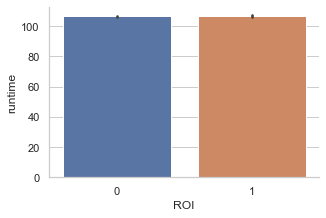

In [100]:
sns.factorplot(x ='ROI', y = 'runtime',  kind = 'bar', data = Box_office_v2, size=3, aspect=1.5);

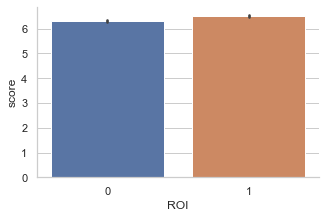

In [101]:
sns.factorplot(x ='ROI', y = 'score',  kind = 'bar', data = Box_office_v2, size=3, aspect=1.5);

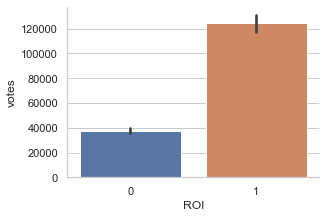

In [102]:
sns.factorplot(x ='ROI', y = 'votes',  kind = 'bar', data = Box_office_v2, size=3, aspect=1.5);

In [21]:
corr_matrix = Box_office_v2.corr()  
corr_matrix

budget     gross   runtime     score     votes    Profit       ROI
budget   1.000000  0.712052  0.267344  0.044869  0.494107  0.138909  0.088688
gross    0.712052  1.000000  0.224996  0.161371  0.664010  0.794230  0.466347
runtime  0.267344  0.224996  1.000000  0.393470  0.308524  0.085985  0.010697
score    0.044869  0.161371  0.393470  1.000000  0.393703  0.188774  0.106497
votes    0.494107  0.664010  0.308524  0.393703  1.000000  0.508946  0.323512
Profit   0.138909  0.794230  0.085985  0.188774  0.508946  1.000000  0.581003
ROI      0.088688  0.466347  0.010697  0.106497  0.323512  0.581003  1.000000

In [22]:
Box_office_v2.corr()

budget     gross   runtime     score     votes    Profit       ROI
budget   1.000000  0.712052  0.267344  0.044869  0.494107  0.138909  0.088688
gross    0.712052  1.000000  0.224996  0.161371  0.664010  0.794230  0.466347
runtime  0.267344  0.224996  1.000000  0.393470  0.308524  0.085985  0.010697
score    0.044869  0.161371  0.393470  1.000000  0.393703  0.188774  0.106497
votes    0.494107  0.664010  0.308524  0.393703  1.000000  0.508946  0.323512
Profit   0.138909  0.794230  0.085985  0.188774  0.508946  1.000000  0.581003
ROI      0.088688  0.466347  0.010697  0.106497  0.323512  0.581003  1.000000

<AxesSubplot:>

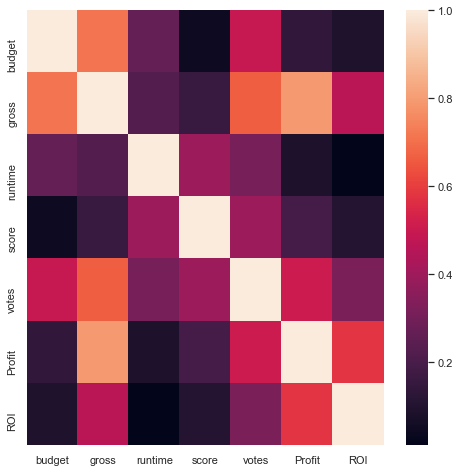

In [105]:
plt.rcParams['figure.figsize'] = 8,8  # control plot sizeimport seaborn as sns
sns.heatmap(Box_office_v2.corr())

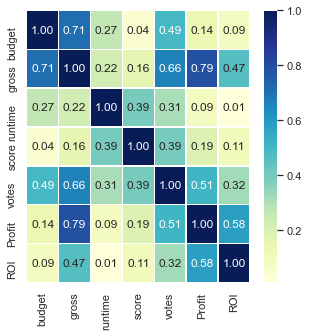

In [106]:
corr_matrix = Box_office_v2.corr()
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

In [107]:
Box_office_v2

budget  country           director   genre        gross  \
0     237000000.0       UK      James Cameron  Action  760507625.0   
1     200000000.0      USA      James Cameron   Drama  658672302.0   
2     150000000.0      USA    Colin Trevorrow  Action  652270625.0   
3     220000000.0      USA        Joss Whedon  Action  623357910.0   
4     185000000.0      USA  Christopher Nolan  Action  534858444.0   
...           ...      ...                ...     ...          ...   
5995   11000000.0       UK    Dominic Anciano  Comedy       1143.0   
5996   11000000.0  Ireland     Ian Fitzgibbon  Action        828.0   
5997   11000000.0   Norway        Petter Næss  Action        547.0   
5998   11000000.0       UK     Sheree Folkson  Comedy        542.0   
5999   11000000.0      USA   Steven R. Monroe   Crime        441.0   

                               name rating  runtime  score               star  \
0                     Avatar (2009)  PG-13      162    7.8    Sam Worthington   
1                    Titanic (1997)  PG-13      194    7.8  Leonardo DiCaprio   
2             Jurassic World (2015)  PG-13      124    7.0        Chris Pratt   
3               The Avengers (2012)  PG-13      143    8.1  Robert Downey Jr.   
4            The Dark Knight (2008)  PG-13      152    9.0     Christian Bale   
...                             ...    ...      ...    ...                ...   
5995    Love, Honor and Obey (2000)      R      103    6.5        Sadie Frost   
5996        Perrier's Bounty (2009)      R       88    6.4      Gabriel Byrne   
5997          Into the White (2012)      R      104    7.2      Florian Lukas   
5998         The Decoy Bride (2011)     PG       89    6.2    Kelly Macdonald   
5999  I Spit on Your Grave 2 (2013)      R      106    5.7    Jemma Dallender   

                                      studio    votes       Profit  ROI  
0     Twentieth Century Fox Film Corporation   958400  523507625.0    1  
1     Twentieth Century Fox Film Corporation   865551  458672302.0    1  
2                         Universal Pictures   470625  502270625.0    1  
3                             Marvel Studios  1069292  403357910.0    1  
4                               Warner Bros.  1845853  349858444.0    1  
...                                      ...      ...          ...  ...  
5995  British Broadcasting Corporation (BBC)     4557  -10998857.0    0  
5996               Parallel Film Productions     5540  -10999172.0    0  
5997           Zentropa International Norway    16674  -10999453.0    0  
5998                        Isle of Man Film     9055  -10999458.0    0  
5999                           Cinetel Films    21145  -10999559.0    0  

[6000 rows x 14 columns]

In [108]:
Box_office_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6000 non-null   float64
 1   country   6000 non-null   object 
 2   director  6000 non-null   object 
 3   genre     6000 non-null   object 
 4   gross     6000 non-null   float64
 5   name      6000 non-null   object 
 6   rating    6000 non-null   object 
 7   runtime   6000 non-null   int64  
 8   score     6000 non-null   float64
 9   star      6000 non-null   object 
 10  studio    6000 non-null   object 
 11  votes     6000 non-null   int64  
 12  Profit    6000 non-null   float64
 13  ROI       6000 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 656.4+ KB


<AxesSubplot:>

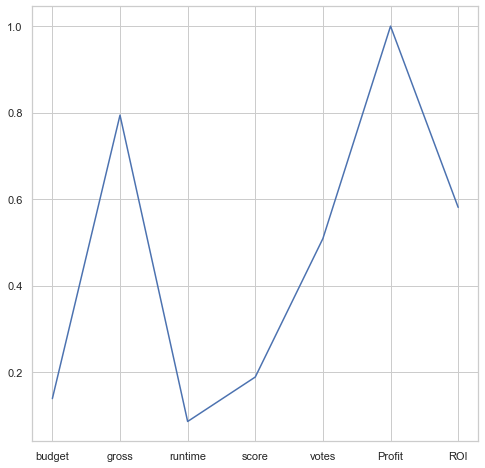

In [109]:
Box_office_v2.corr()['Profit'].plot()

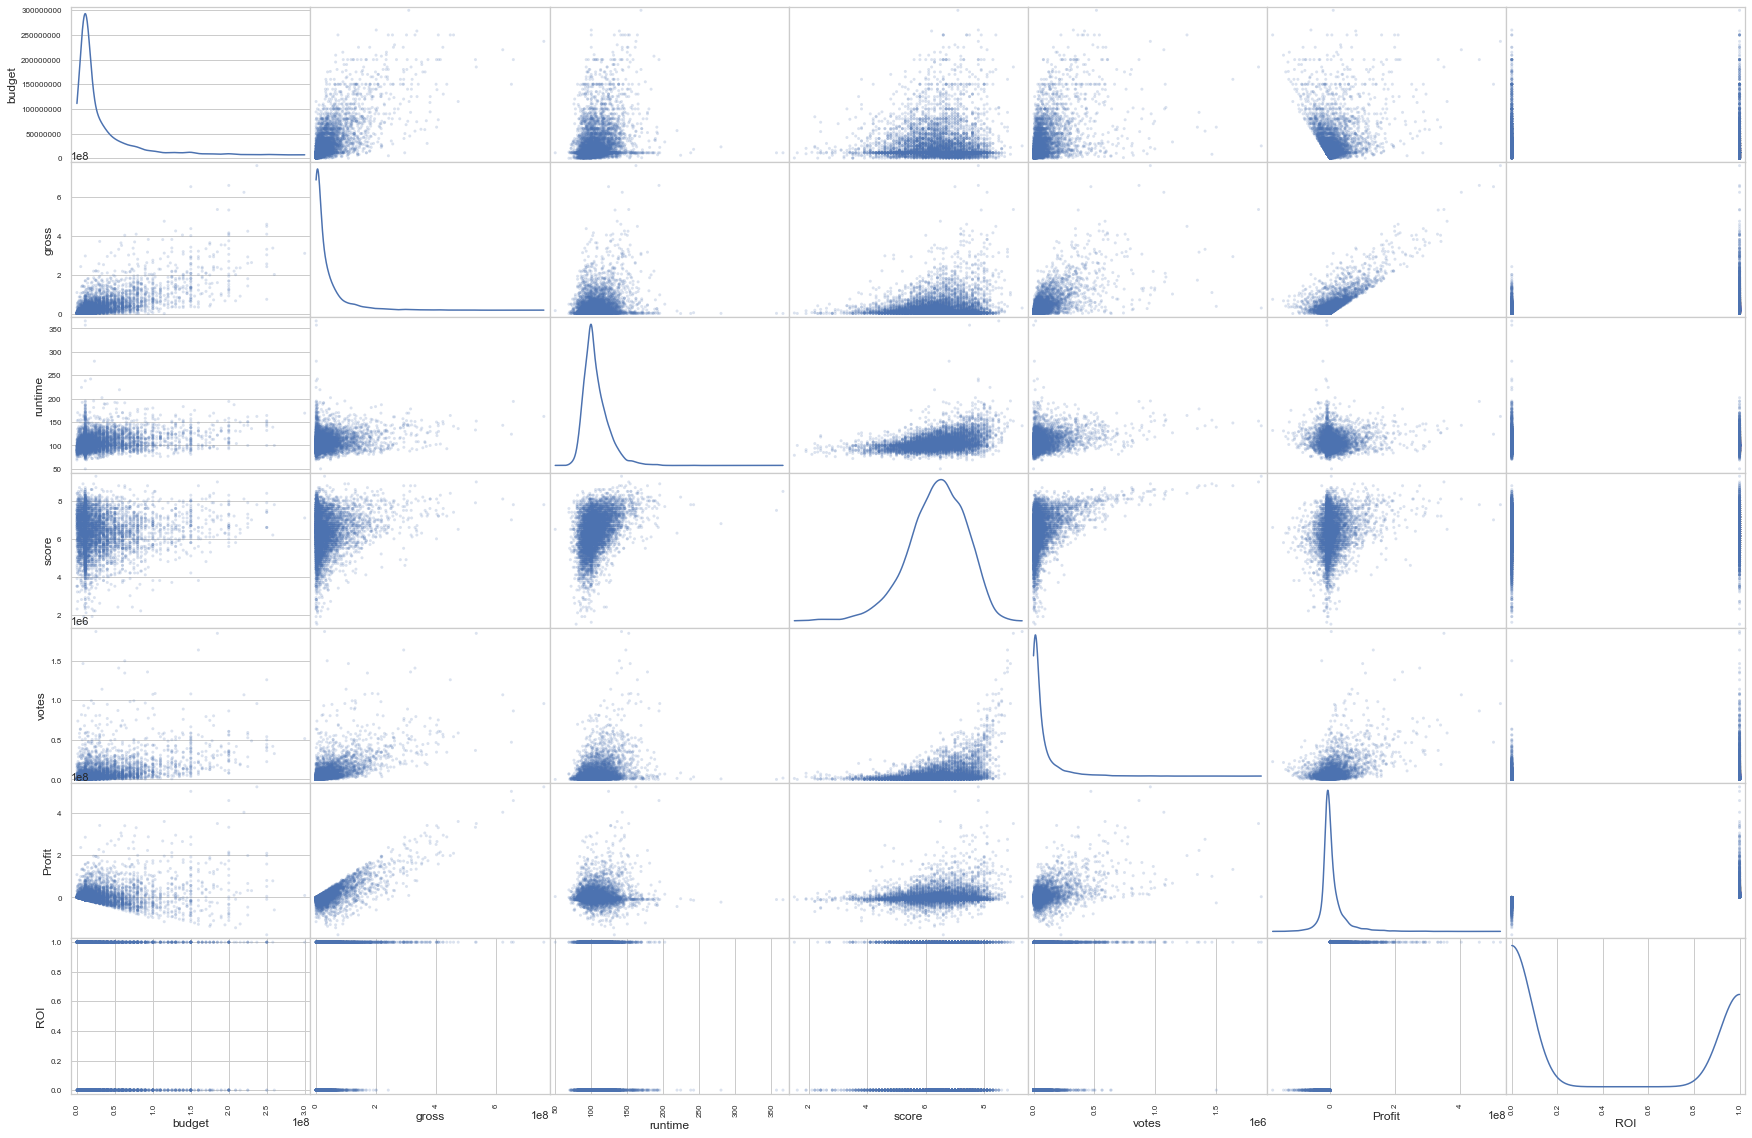

In [110]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(Box_office_v2, alpha=0.2, figsize=(30, 20), diagonal='kde')

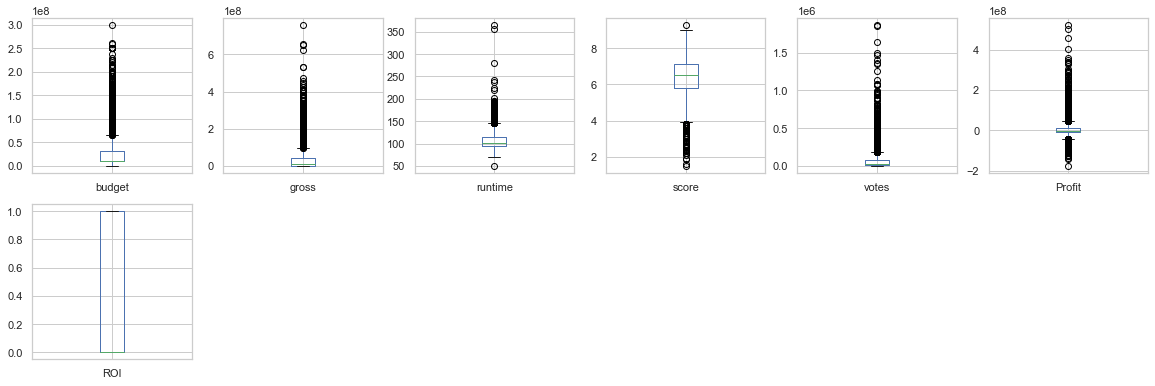

In [111]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,20  # control plot size
Box_office_v2.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()

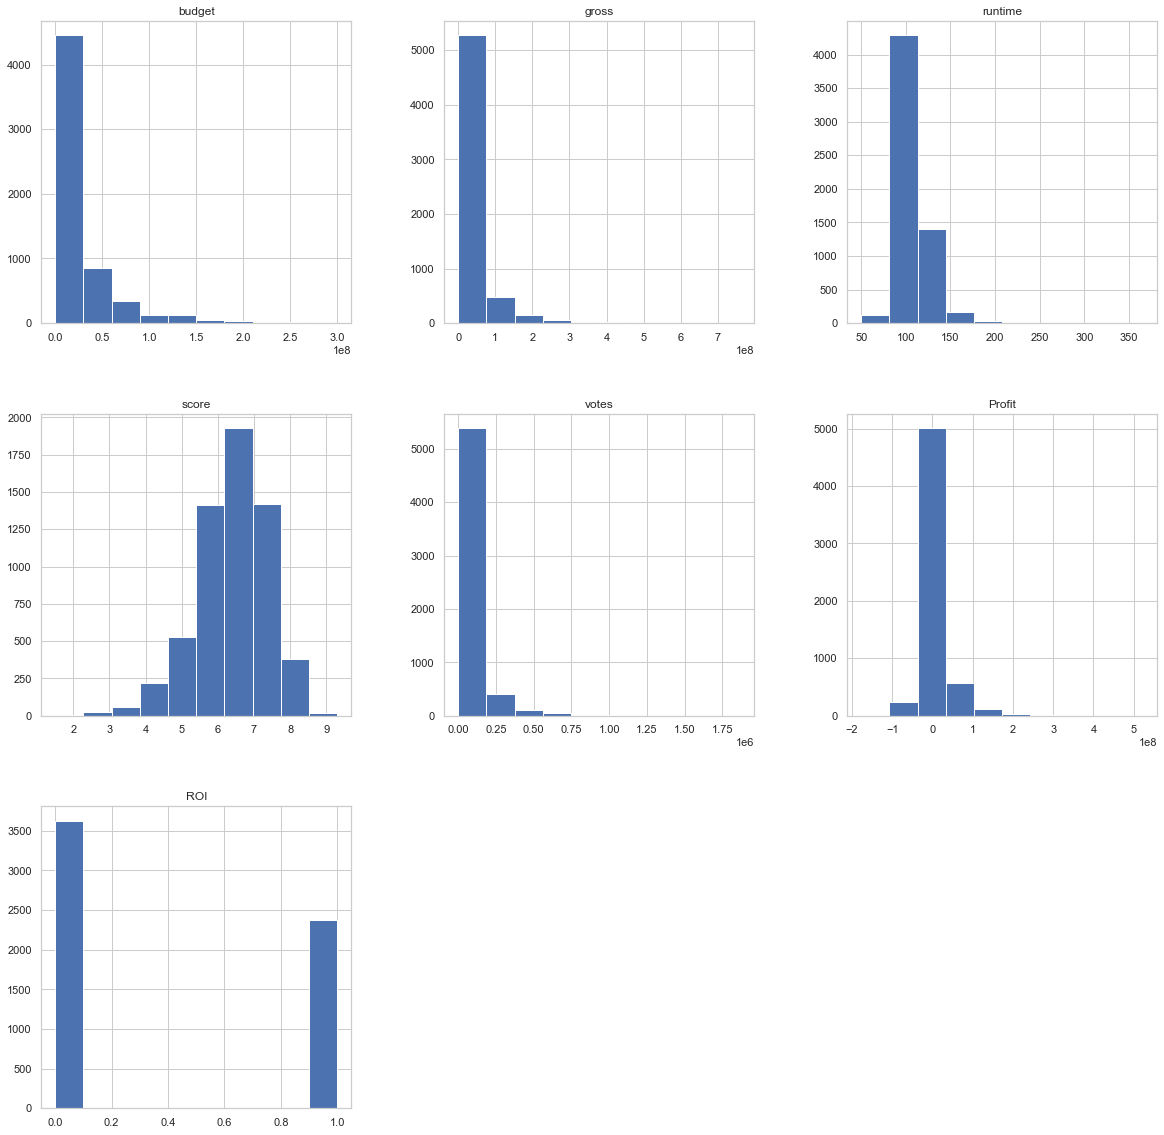

In [112]:
plt.rcParams['figure.figsize'] = 20,20  # control plot size

Box_office_v2.hist()
plt.show()

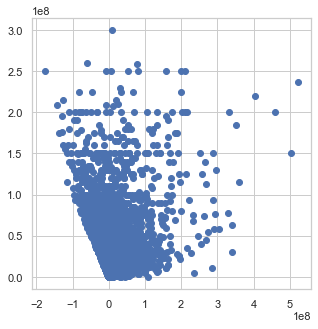

In [113]:
plt.rcParams['figure.figsize'] = 5,5

plt.scatter(Box_office_v2['Profit'], Box_office_v2['budget']);

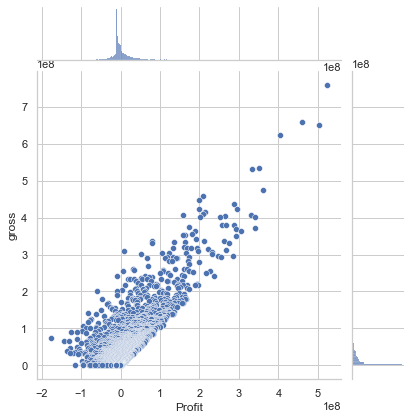

In [114]:
sns.jointplot(x='Profit', y='gross', 
              data= Box_office_v2, kind='scatter');

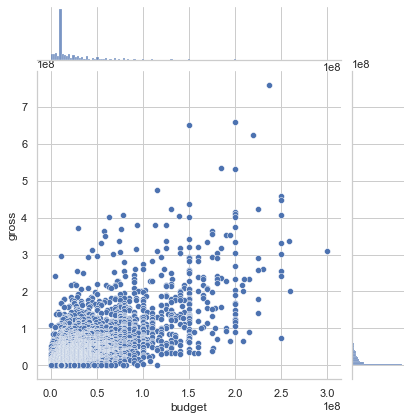

In [115]:
sns.jointplot(x='budget', y='gross', 
              data=Box_office_v2, kind='scatter');

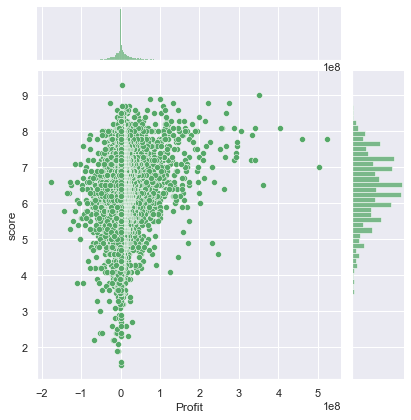

In [91]:
sns.jointplot('Profit', 'score', data=Box_office_v2,
              kind="scatter", color="g");

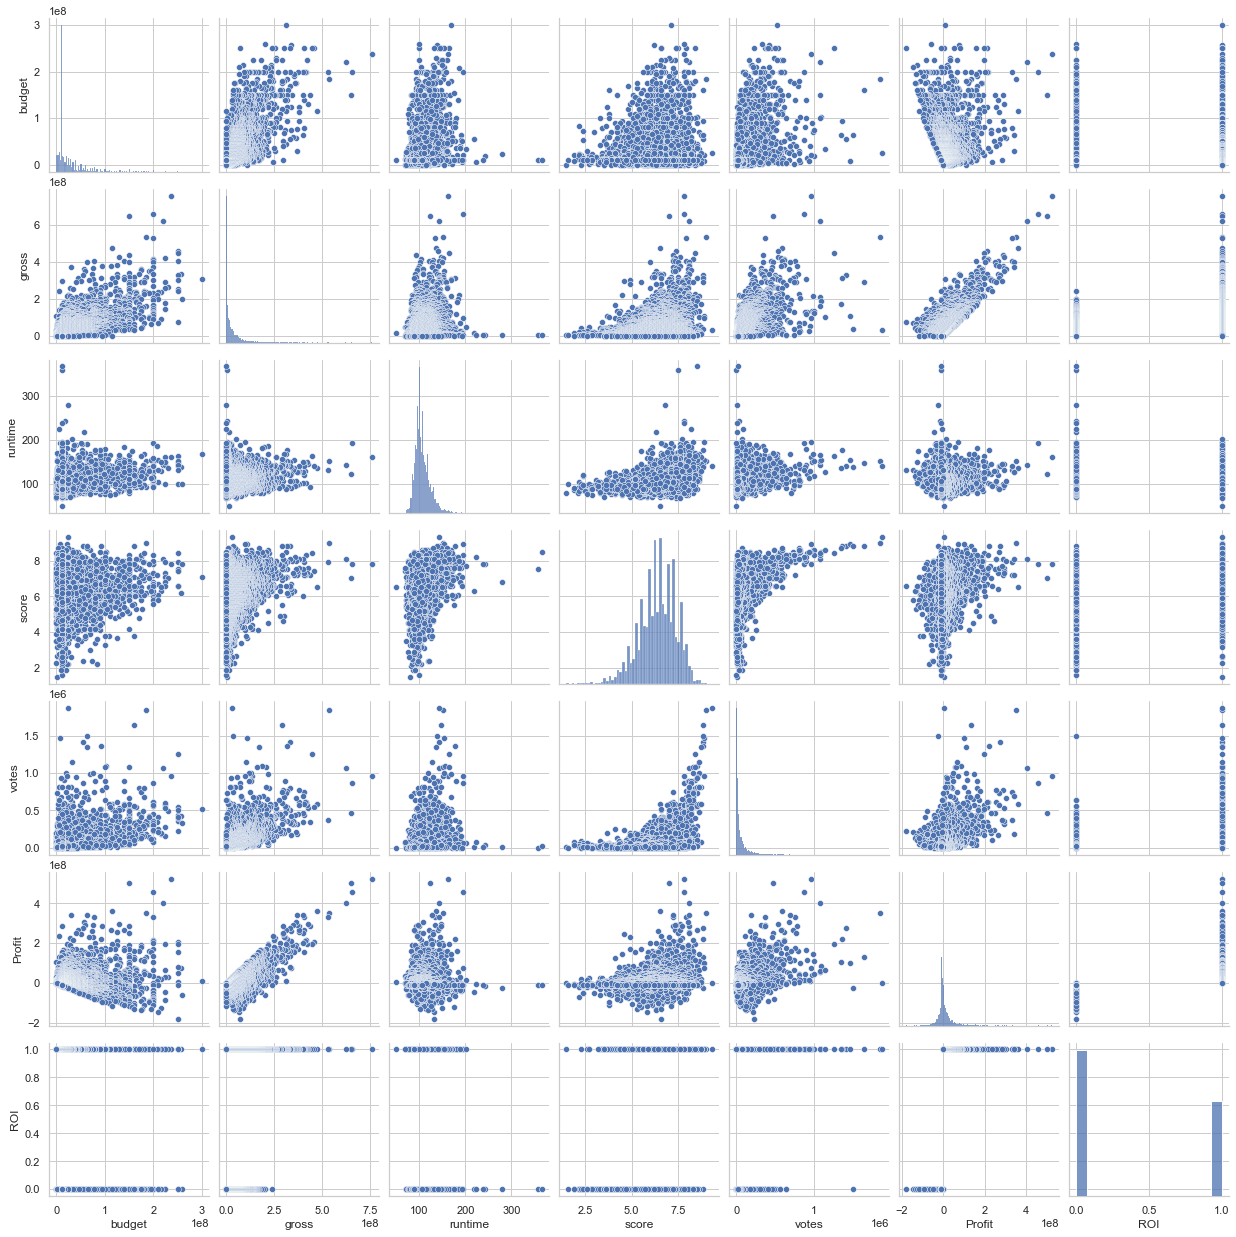

In [116]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(Box_office_v2);

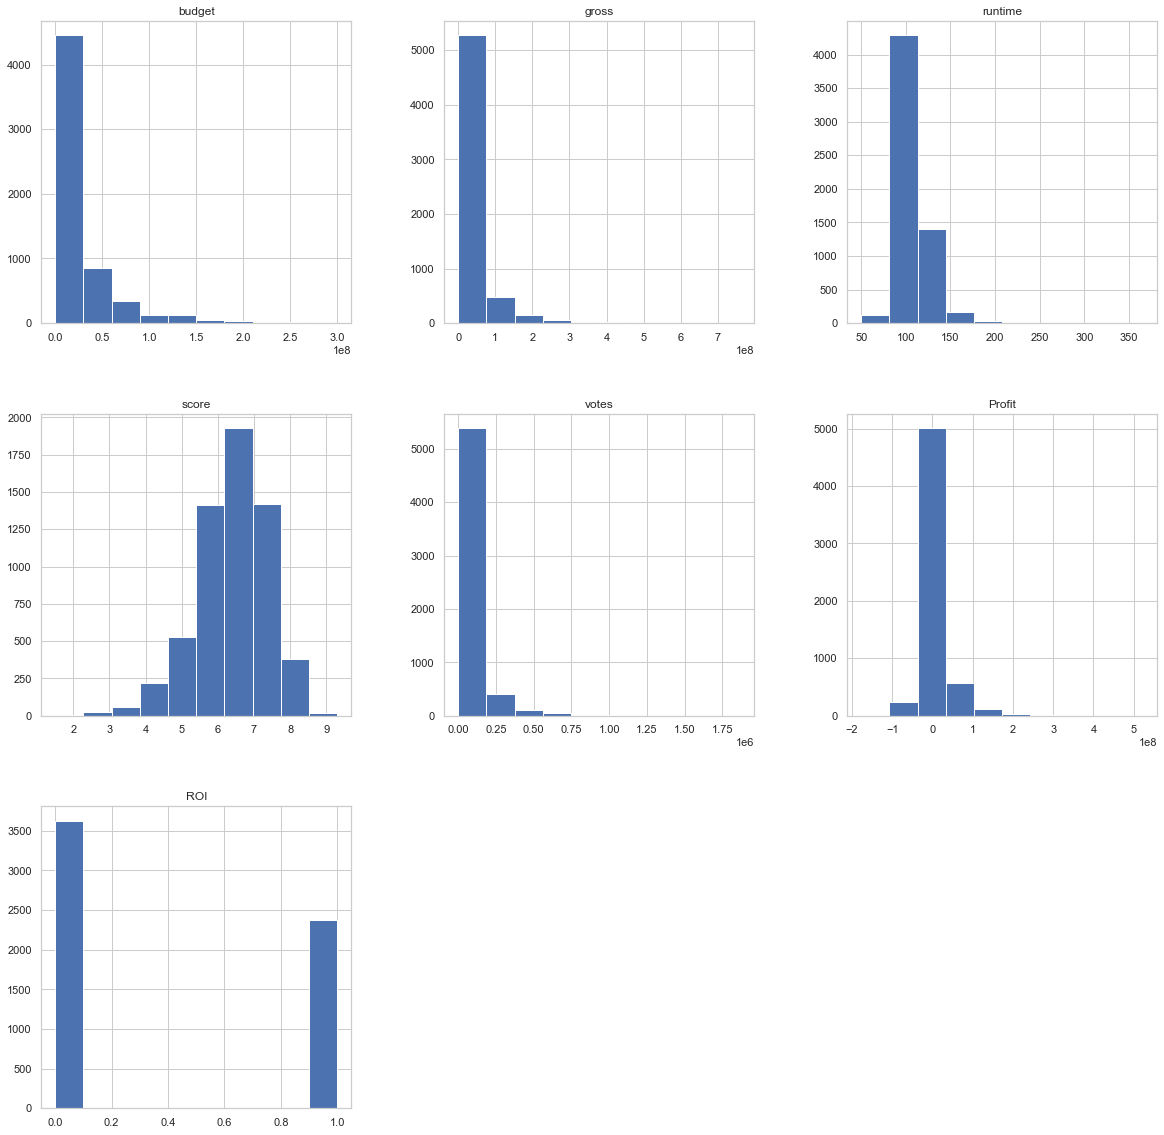

In [117]:
plt.rcParams['figure.figsize'] = 20,20  # control plot size

Box_office_v2.hist()
plt.show()

In [118]:
!pip install pandas_profiling
import pandas_profiling
from pandas_profiling import ProfileReport

In [119]:
profile = ProfileReport(Box_office_v2, title='Pandas Profiling Report', explorative=True)

In [120]:
profile

# plotting categorical data with TV

In [28]:
Box_office_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   budget       6000 non-null   float64
 1   country      6000 non-null   object 
 2   director     6000 non-null   object 
 3   genre        6000 non-null   object 
 4   gross        6000 non-null   float64
 5   name         6000 non-null   object 
 6   rating       6000 non-null   object 
 7   runtime      6000 non-null   int64  
 8   score        6000 non-null   float64
 9   star         6000 non-null   object 
 10  studio       6000 non-null   object 
 11  votes        6000 non-null   int64  
 12  Profit       6000 non-null   float64
 13  ROI_in_$     6000 non-null   float64
 14  Profit_>95%  6000 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 703.2+ KB


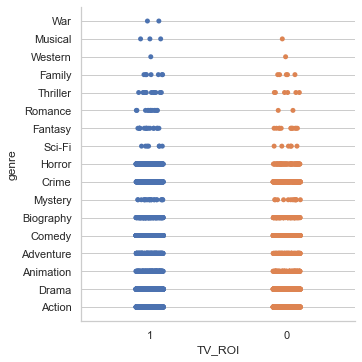

In [100]:
sns.catplot(x="ROI", y="genre", data=Box_office_v2)

In [121]:
CrosstabResult = pd.crosstab(index = Box_office_v2['genre'], columns = Box_office_v2['ROI'])
print(CrosstabResult)

ROI           0    1
genre               
Action      694  481
Adventure   187  153
Animation   119  127
Biography   205  104
Comedy     1021  797
Crime       307  156
Drama       911  369
Family       10    2
Fantasy      15   13
Horror      104  139
Musical       4    0
Mystery      17   17
Romance       9    5
Sci-Fi        8    5
Thriller     14    3
War           2    0
Western       1    1


In [123]:
#sns.catplot(x="ROI", y="director", data=Box_office_v2)

In [125]:
CrosstabResult = pd.crosstab(index = Box_office_v2['director'], columns = Box_office_v2['ROI'])
print(CrosstabResult)

ROI                0  1
director               
A.R. Murugadoss    1  0
Aamir Khan         1  0
Aaron Blaise       1  0
Aaron Harvey       1  0
Aaron Norris       4  1
...               .. ..
Åke Sandgren       1  0
Élie Chouraqui     1  0
Éric Rohmer        6  0
Étienne Chatiliez  1  0
Éva Gárdos         1  0

[2549 rows x 2 columns]


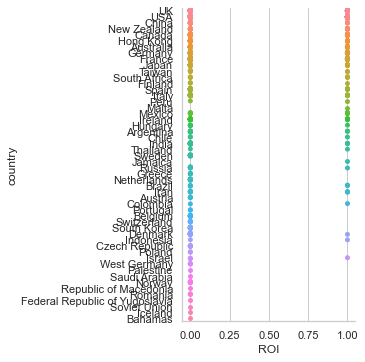

In [126]:
sns.catplot(x="ROI", y="country", data=Box_office_v2)

In [127]:
CrosstabResult = pd.crosstab(index = Box_office_v2['country'], columns = Box_office_v2['ROI'])
print(CrosstabResult)

ROI                                0     1
country                                   
Argentina                          8     2
Australia                         51    20
Austria                            4     0
Bahamas                            1     0
Belgium                           15     0
Brazil                             3     2
Canada                           103    23
Chile                              2     1
China                             19     4
Colombia                           1     1
Czech Republic                     8     0
Denmark                           30     1
Federal Republic of Yugoslavia     1     0
Finland                            2     1
France                           210    39
Germany                           87    32
Greece                             4     0
Hong Kong                         28    10
Hungary                            6     1
Iceland                            1     0
India                             33     3
Indonesia  

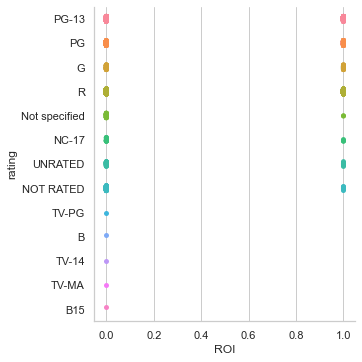

In [128]:
sns.catplot(x="ROI", y="rating", data=Box_office_v2)

In [129]:
CrosstabResult = pd.crosstab(index = Box_office_v2['rating'], columns = Box_office_v2['ROI'])
print(CrosstabResult)

ROI               0     1
rating                   
B                 1     0
B15               1     0
G                63    70
NC-17            16     4
NOT RATED       143     8
Not specified    54     2
PG              392   423
PG-13           929   824
R              1976  1033
TV-14             1     0
TV-MA             1     0
TV-PG             1     0
UNRATED          50     8


In [130]:
#sns.catplot(x='ROI", y="star", data=Box_office_v2)

In [132]:
CrosstabResult = pd.crosstab(index = Box_office_v2['star'], columns = Box_office_v2['ROI'])
print(CrosstabResult)

ROI              0  1
star                 
50 Cent          1  0
A.J. Cook        0  1
Aaliyah          1  0
Aamir Khan       8  1
Aaron Eckhart    3  3
...             .. ..
Ziyi Zhang       3  0
Zoe Saldana      1  0
Zoey Deutch      1  1
Zooey Deschanel  1  0
Álex Angulo      1  0

[2317 rows x 2 columns]


In [133]:
#sns.catplot(x="ROI", y="studio", data=Box_office_v2)

In [135]:
CrosstabResult = pd.crosstab(index = Box_office_v2['studio'], columns = Box_office_v2['ROI'])
print(CrosstabResult)

ROI                              0  1
studio                               
"DIA" Productions GmbH & Co. KG  1  0
1+2 Seisaku Iinkai               1  0
101st Street Films               1  0
10th Hole Productions            1  0
13 Productions                   1  0
...                             .. ..
Zucker Brothers Productions      1  0
double A Films                   1  0
erbp                             0  1
i5 Films                         0  1
micro_scope                      1  0

[1996 rows x 2 columns]


# Level Down COUNTRY

In [20]:
Box_office_v2['country'].value_counts()

USA                               4281
UK                                 615
France                             249
Canada                             126
Germany                            119
Australia                           71
Japan                               59
Spain                               50
Italy                               47
Ireland                             40
Hong Kong                           38
India                               36
Denmark                             31
China                               23
South Korea                         18
New Zealand                         17
Sweden                              17
Belgium                             15
Mexico                              13
Netherlands                         12
Argentina                           10
Russia                              10
Iran                                10
Norway                               8
Czech Republic                       8
Taiwan                   

In [21]:
Box_office_v2.loc[Box_office_v2['country'] != 'USA', ['country']] = 'non-USA'

Box_office_v2['country'].unique()
Box_office_v2['country'].value_counts()

USA        4281
non-USA    1719
Name: country, dtype: int64

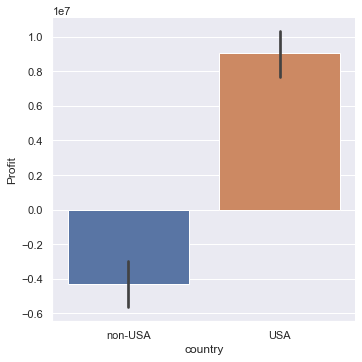

In [22]:
sns.factorplot(x ='country', y = 'Profit',  kind = 'bar', data = Box_office_v2, size=5, aspect=1);

# Level down RATING

In [23]:
Box_office_v2['rating'].value_counts()

R                3009
PG-13            1753
PG                815
NOT RATED         151
G                 133
UNRATED            58
Not specified      56
NC-17              20
TV-14               1
TV-MA               1
B15                 1
TV-PG               1
B                   1
Name: rating, dtype: int64

In [24]:
Box_office_v2 = Box_office_v2.replace(to_replace =["PG-13","PG","G","TV-PG","TV-14","B15"] ,  value ="PG")
#Box_office_v2 = Box_office_v2.replace(to_replace =[] ,  value ="Youth")
Box_office_v2 = Box_office_v2.replace(to_replace =["Not specified","UNRATED","NOT RATED","B"] ,  value ="NR")
Box_office_v2 = Box_office_v2.replace(to_replace =["R","TV-MA","NC-17"] ,  value ="R")

In [25]:
Box_office_v2['rating'].value_counts()

R     3030
PG    2704
NR     266
Name: rating, dtype: int64

# Level down Genre

In [26]:
Box_office_v2['genre'].value_counts()

Comedy       1818
Drama        1280
Action       1175
Crime         463
Adventure     340
Biography     309
Animation     246
Horror        243
Mystery        34
Fantasy        28
Thriller       17
Romance        14
Sci-Fi         13
Family         12
Musical         4
Western         2
War             2
Name: genre, dtype: int64

In [27]:
Box_office_v2 = Box_office_v2.replace(to_replace =["Crime","Adventure","Biography","Animation","Horror","Mystery",
                                                   "Fantasy","Thriller","Romance","Sci-Fi","Family","Musical",
                                                   "War","Western"], value ="Others")


In [28]:
Box_office_v2['genre'].value_counts()

Comedy    1818
Others    1727
Drama     1280
Action    1175
Name: genre, dtype: int64

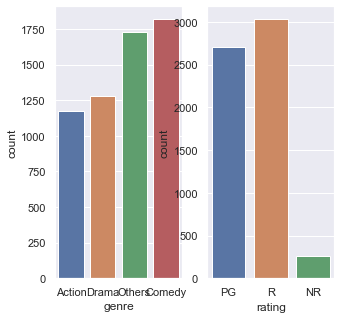

In [29]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

sns.countplot(x='genre', data= Box_office_v2, ax=axes[0]);
sns.countplot(x='rating', data= Box_office_v2, ax=axes[1]);

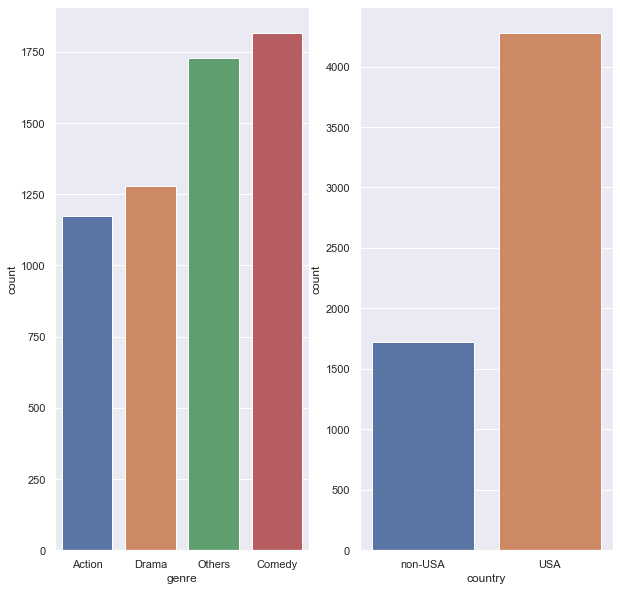

In [33]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

sns.countplot(x='genre', data= Box_office_v2, ax=axes[0]);
sns.countplot(x='country', data= Box_office_v2, ax=axes[1]);

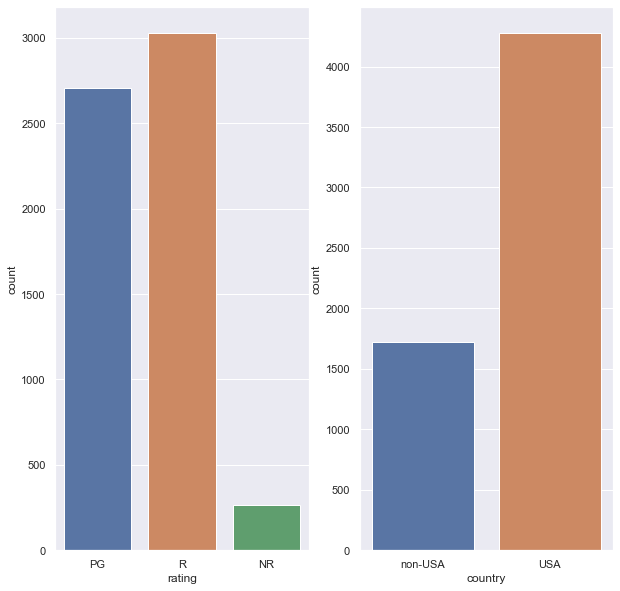

In [34]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

sns.countplot(x='rating', data= Box_office_v2, ax=axes[0]);
sns.countplot(x='country', data= Box_office_v2, ax=axes[1]);

# Level down Stars

In [53]:
Box_office_v2.sort_values(by = ['Profit', 'ROI'], ascending = False, inplace = True, ignore_index = True)
top_50 = Box_office_v2.loc[0:50, 'star']
Box_office_v2['star_names'] = top_50

In [54]:
Box_office_v2.head()

budget  country         director   genre        gross  \
0  237000000.0  non-USA    James Cameron  Action  760507625.0   
1  150000000.0      USA  Colin Trevorrow  Action  652270625.0   
2  200000000.0      USA    James Cameron   Drama  658672302.0   
3  220000000.0      USA      Joss Whedon  Action  623357910.0   
4  115000000.0      USA     George Lucas  Action  474544677.0   

                                               name rating  runtime  score  \
0                                     Avatar (2009)     PG      162    7.8   
1                             Jurassic World (2015)     PG      124    7.0   
2                                    Titanic (1997)     PG      194    7.8   
3                               The Avengers (2012)     PG      143    8.1   
4  Star Wars: Episode I - The Phantom Menace (1999)     PG      136    6.5   

                star                                  studio    votes  \
0    Sam Worthington  Twentieth Century Fox Film Corporation   958400   
1        Chris Pratt                      Universal Pictures   470625   
2  Leonardo DiCaprio  Twentieth Century Fox Film Corporation   865551   
3  Robert Downey Jr.                          Marvel Studios  1069292   
4      Ewan McGregor                               Lucasfilm   587113   

        Profit  ROI         star_names  
0  523507625.0    1    Sam Worthington  
1  502270625.0    1        Chris Pratt  
2  458672302.0    1  Leonardo DiCaprio  
3  403357910.0    1  Robert Downey Jr.  
4  359544677.0    1      Ewan McGregor

In [55]:
Box_office_v2['star_names'].unique()

array(['Sam Worthington', 'Chris Pratt', 'Leonardo DiCaprio',
       'Robert Downey Jr.', 'Ewan McGregor', 'Christian Bale',
       'Jim Caviezel', 'Sam Neill', 'Felicity Jones', 'Jennifer Lawrence',
       'Ryan Reynolds', 'Steve Carell', 'Bradley Cooper', 'Albert Brooks',
       'Mike Myers', 'Daniel Radcliffe', 'Tom Hanks', 'Matthew Broderick',
       'Hayden Christensen', 'Tobey Maguire', 'Sandra Bullock',
       'Bruce Willis', 'Kristen Bell', 'Kristen Stewart', 'Nia Vardalos',
       'Will Smith', 'Quinton Aaron', 'Elijah Wood', 'Michael Keaton',
       'Shia LaBeouf', 'Ben Stiller', 'Johnny Depp', 'Patrick Swayze',
       'Robin Williams', "Paige O'Hara", 'Ginnifer Goodwin',
       'Scott Weinger', 'Neel Sethi', 'Amy Poehler', nan], dtype=object)

In [56]:
Box_office_v2['star_names'] = Box_office_v2['star_names'].replace(to_replace =['Sam Worthington', 'Chris Pratt', 'Leonardo DiCaprio',
       'Robert Downey Jr.', 'Ewan McGregor', 'Christian Bale',
       'Jim Caviezel', 'Sam Neill', 'Felicity Jones', 'Jennifer Lawrence',
       'Ryan Reynolds', 'Steve Carell', 'Bradley Cooper', 'Albert Brooks',
       'Mike Myers', 'Daniel Radcliffe', 'Tom Hanks', 'Matthew Broderick',
       'Hayden Christensen', 'Tobey Maguire', 'Sandra Bullock',
       'Bruce Willis', 'Kristen Bell', 'Kristen Stewart', 'Nia Vardalos',
       'Will Smith', 'Quinton Aaron', 'Elijah Wood', 'Michael Keaton',
       'Shia LaBeouf', 'Ben Stiller', 'Johnny Depp', 'Patrick Swayze',
       'Robin Williams', "Paige O'Hara", 'Ginnifer Goodwin',
       'Scott Weinger', 'Neel Sethi', 'Amy Poehler'] ,  value ="Famous")

In [57]:
Box_office_v2['star_names'].fillna('Not-Famous', inplace = True)

In [58]:
Box_office_v2['star_names'].unique()

array(['Famous', 'Not-Famous'], dtype=object)

# Level down Studio

In [61]:
Box_office_v2.sort_values(by = ['Profit','ROI'], ascending = False, inplace = True, ignore_index = True)
top_50 = Box_office_v2.loc[0:50, 'studio']
Box_office_v2['studio_names'] = top_50

In [62]:
Box_office_v2['studio_names'].unique()

array(['Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Marvel Studios', 'Lucasfilm', 'Warner Bros.', 'Icon Productions',
       'Lionsgate', 'Color Force', 'Pixar Animation Studios',
       'DreamWorks', 'Paramount Pictures', 'Walt Disney Pictures',
       'Columbia Pictures Corporation', 'Illumination Entertainment',
       'Hollywood Pictures', 'Walt Disney Animation Studios',
       'Temple Hill Entertainment', 'Gold Circle Films',
       'Summit Entertainment', 'Alcon Entertainment', 'New Line Cinema',
       'Fairview Entertainment', nan], dtype=object)

In [63]:
Box_office_v2['studio_names'] = Box_office_v2['studio_names'].replace(to_replace =['Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Marvel Studios', 'Lucasfilm', 'Warner Bros.', 'Icon Productions',
       'Lionsgate', 'Color Force', 'Pixar Animation Studios',
       'DreamWorks', 'Paramount Pictures', 'Walt Disney Pictures',
       'Columbia Pictures Corporation', 'Illumination Entertainment',
       'Hollywood Pictures', 'Walt Disney Animation Studios',
       'Temple Hill Entertainment', 'Gold Circle Films',
       'Summit Entertainment', 'Alcon Entertainment', 'New Line Cinema',
       'Fairview Entertainment'] ,  value ="Top_Studio")


In [64]:
Box_office_v2['studio_names'].fillna('Low-Studio', inplace = True)

In [65]:
Box_office_v2['studio_names'].unique()

array(['Top_Studio', 'Low-Studio'], dtype=object)

In [66]:
Box_office_v2.head()

budget  country         director   genre        gross  \
0  237000000.0  non-USA    James Cameron  Action  760507625.0   
1  150000000.0      USA  Colin Trevorrow  Action  652270625.0   
2  200000000.0      USA    James Cameron   Drama  658672302.0   
3  220000000.0      USA      Joss Whedon  Action  623357910.0   
4  115000000.0      USA     George Lucas  Action  474544677.0   

                                               name rating  ...  \
0                                     Avatar (2009)     PG  ...   
1                             Jurassic World (2015)     PG  ...   
2                                    Titanic (1997)     PG  ...   
3                               The Avengers (2012)     PG  ...   
4  Star Wars: Episode I - The Phantom Menace (1999)     PG  ...   

                star                                  studio    votes  \
0    Sam Worthington  Twentieth Century Fox Film Corporation   958400   
1        Chris Pratt                      Universal Pictures   470625   
2  Leonardo DiCaprio  Twentieth Century Fox Film Corporation   865551   
3  Robert Downey Jr.                          Marvel Studios  1069292   
4      Ewan McGregor                               Lucasfilm   587113   

        Profit  ROI  star_names  studio_names  
0  523507625.0    1      Famous    Top_Studio  
1  502270625.0    1      Famous    Top_Studio  
2  458672302.0    1      Famous    Top_Studio  
3  403357910.0    1      Famous    Top_Studio  
4  359544677.0    1      Famous    Top_Studio  

[5 rows x 16 columns]

# # Deleting our columns

In [67]:
to_delete = ['director', 'name' , 'runtime' , 'star', 'studio','Profit']

In [68]:
Box_office_v2 = Box_office_v2.drop(to_delete, axis = 1 )

In [69]:
Box_office_v2

budget  country   genre        gross rating  score    votes  ROI  \
0     237000000.0  non-USA  Action  760507625.0     PG    7.8   958400    1   
1     150000000.0      USA  Action  652270625.0     PG    7.0   470625    1   
2     200000000.0      USA   Drama  658672302.0     PG    7.8   865551    1   
3     220000000.0      USA  Action  623357910.0     PG    8.1  1069292    1   
4     115000000.0      USA  Action  474544677.0     PG    6.5   587113    1   
...           ...      ...     ...          ...    ...    ...      ...  ...   
5995  176000000.0      USA  Action   47387723.0     PG    5.3   154144    0   
5996  195000000.0      USA  Others   65187603.0     PG    6.3   114307    0   
5997  175000000.0      USA  Action   38362475.0     PG    6.3   126315    0   
5998  209000000.0      USA  Action   65422625.0     PG    5.8   214631    0   
5999  250000000.0      USA  Action   73078100.0     PG    6.6   224996    0   

      star_names studio_names  
0         Famous   Top_Studio  
1         Famous   Top_Studio  
2         Famous   Top_Studio  
3         Famous   Top_Studio  
4         Famous   Top_Studio  
...          ...          ...  
5995  Not-Famous   Low-Studio  
5996  Not-Famous   Low-Studio  
5997  Not-Famous   Low-Studio  
5998  Not-Famous   Low-Studio  
5999  Not-Famous   Low-Studio  

[6000 rows x 10 columns]

In [70]:
Box_office_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        6000 non-null   float64
 1   country       6000 non-null   object 
 2   genre         6000 non-null   object 
 3   gross         6000 non-null   float64
 4   rating        6000 non-null   object 
 5   score         6000 non-null   float64
 6   votes         6000 non-null   int64  
 7   ROI           6000 non-null   int64  
 8   star_names    6000 non-null   object 
 9   studio_names  6000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 468.9+ KB


In [71]:
Box_office_v2.to_csv('Box_office_v2.csv')